In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
%load_ext google.colab.data_table
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import cufflinks as cf
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/imports-85.data',header =None)

In [ ]:
#pip install missingno

In [ ]:
import missingno as msno

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# The Data Set

Column name glossary:

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    int64  
 1   1       205 non-null    object 
 2   2       205 non-null    object 
 3   3       205 non-null    object 
 4   4       205 non-null    object 
 5   5       205 non-null    object 
 6   6       205 non-null    object 
 7   7       205 non-null    object 
 8   8       205 non-null    object 
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    int64  
 14  14      205 non-null    object 
 15  15      205 non-null    object 
 16  16      205 non-null    int64  
 17  17      205 non-null    object 
 18  18      205 non-null    object 
 19  19      205 non-null    object 
 20  20      205 non-null    float64
 21  21      205 non-null    object 
 22  22

## Let's first rename the are numerical.

In [ ]:
map = {0:'symboling',1:'normalized_losses',2:'name',5:'doors',9:'wheel_base',10:'length',11:'width',
           12:'height',13:'curb_weight', 15:'cylinders', 16:'engine_size',
           18:'bore',19:'stroke', 20:'compression_ratio', 21:'horsepower',22:'peak_rpm', 23:'city_mpg',24:'highway_mpg',25:'price'}
data = data.copy()
data = data.rename(mapper=map,axis=1)

In [ ]:
#@title Table of data
data.head(5)

,symboling,normalized_losses,name,3,4,doors,6,7,8,wheel_base,length,width,height,curb_weight,14,cylinders,engine_size,17,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The normalized_losses column contains '?' symbols which are missing data. Let's replace it with np.nan arguments.

In [ ]:
data['normalized_losses'] = data['normalized_losses'].apply(lambda x: np.nan if x == '?' else x)

let's also replace the cylinders column with numbers



In [ ]:
data['cylinders'].value_counts()
wrten2numb = {'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12}
data['cylinders'] = data['cylinders'].map(wrten2numb)
data['cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylinders, dtype: int64

Let's also convert the price column to float64

In [ ]:
print(data['price'].value_counts())
print("there are 4 '?'in the price column")

?        4
8921     2
8495     2
16500    2
7957     2
        ..
7463     1
13645    1
8778     1
23875    1
7995     1
Name: price, Length: 187, dtype: int64
there are 4 '?'in the price column


In [ ]:
data['price'] = data['price'].apply(lambda x: np.nan if x == '?' else x)
data['price'] = data['price'].astype(float)

Let's check how many missing values there are in the normalized_loss column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   name               205 non-null    object 
 3   3                  205 non-null    object 
 4   4                  205 non-null    object 
 5   doors              205 non-null    object 
 6   6                  205 non-null    object 
 7   7                  205 non-null    object 
 8   8                  205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  14                 205 non-null    object 
 15  cylinders          205 non-null    int64  
 16  engine_size        205 non

The scatter plot don't give evidence of strong correlation between the normalized_losses and the price. It is not justifyable to keep the entire column in the analysis. It have 20% missing values and are not likely to improve the predictions. Let's drop it!

In [ ]:
data = data.drop(labels = 'normalized_losses', axis = 1)

In [ ]:
data.head(5)

,symboling,name,3,4,doors,6,7,8,wheel_base,length,width,height,curb_weight,14,cylinders,engine_size,17,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Choosing features

Let's analyze it is worthing keeping the 'doors' column. It's a numerical variable but only with two possible values. Is it worth to keep it as a predictor of price? Let's see a histogram.

In [ ]:
#@title Histogram
data2 = data.copy()
data2['two_doors'] = data.loc[data['doors'] == 'two', 'price']
data2['four_doors'] = data.loc[data['doors'] == 'four', 'price']
mean1 = data2['two_doors'].mean()
mean2 = data2['four_doors'].mean()
fig = data2.iplot(asFigure=True,kind='histogram', columns = ['two_doors','four_doors'],
          vline=[mean1,mean2],bins=10)
fig.update_layout(width=800,height=600)
fig.show()
#data

As the histogram shows, there is no considerable difference in the distribution of the price for the cars with two and four doors. It means that the performance improving cause by including the `doors` variable may not justify the increasing complexity. Thus, let's drop it and all non-numerical variables from the data set.

In [ ]:
data = data.drop(labels = [3,4,6,7,8,14,17,'doors'], axis=1)

In [ ]:
data.head(10)

,symboling,name,wheel_base,length,width,height,curb_weight,cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0
5,2,audi,99.8,177.3,66.3,53.1,2507,5,136,3.19,3.40,8.5,110,5500,19,25,15250.0
6,1,audi,105.8,192.7,71.4,55.7,2844,5,136,3.19,3.40,8.5,110,5500,19,25,17710.0
7,1,audi,105.8,192.7,71.4,55.7,2954,5,136,3.19,3.40,8.5,110,5500,19,25,18920.0
8,1,audi,105.8,192.7,71.4,55.9,3086,5,131,3.13,3.40,8.3,140,5500,17,20,23875.0
9,0,audi,99.5,178.2,67.9,52.0,3053,5,131,3.13,3.40,7.0,160,5500,16,22,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   name               205 non-null    object 
 2   wheel_base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb_weight        205 non-null    int64  
 7   cylinders          205 non-null    int64  
 8   engine_size        205 non-null    int64  
 9   bore               205 non-null    object 
 10  stroke             205 non-null    object 
 11  compression_ratio  205 non-null    float64
 12  horsepower         205 non-null    object 
 13  peak_rpm           205 non-null    object 
 14  city_mpg           205 non-null    int64  
 15  highway_mpg        205 non-null    int64  
 16  price              201 non

Some numerical columns still are of 'object' Dtype which means they are string objects. They may have the '?' string in the rows. Firstly let's replace '?' with np.NaN and them convert the columns to float64 Dtype


## **use a funcao dataframe.replace !**

In [ ]:
names = ['bore','stroke','horsepower','peak_rpm']
for i in names:
    data[i] = data[i].apply(lambda x: np.nan if x == '?' else float(x))


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   name               205 non-null    object 
 2   wheel_base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb_weight        205 non-null    int64  
 7   cylinders          205 non-null    int64  
 8   engine_size        205 non-null    int64  
 9   bore               201 non-null    float64
 10  stroke             201 non-null    float64
 11  compression_ratio  205 non-null    float64
 12  horsepower         203 non-null    float64
 13  peak_rpm           203 non-null    float64
 14  city_mpg           205 non-null    int64  
 15  highway_mpg        205 non-null    int64  
 16  price              201 non

# Still handling missing values

I've ignored some durty data in the beginning, so I have to handle it now

Let's see the missing values!

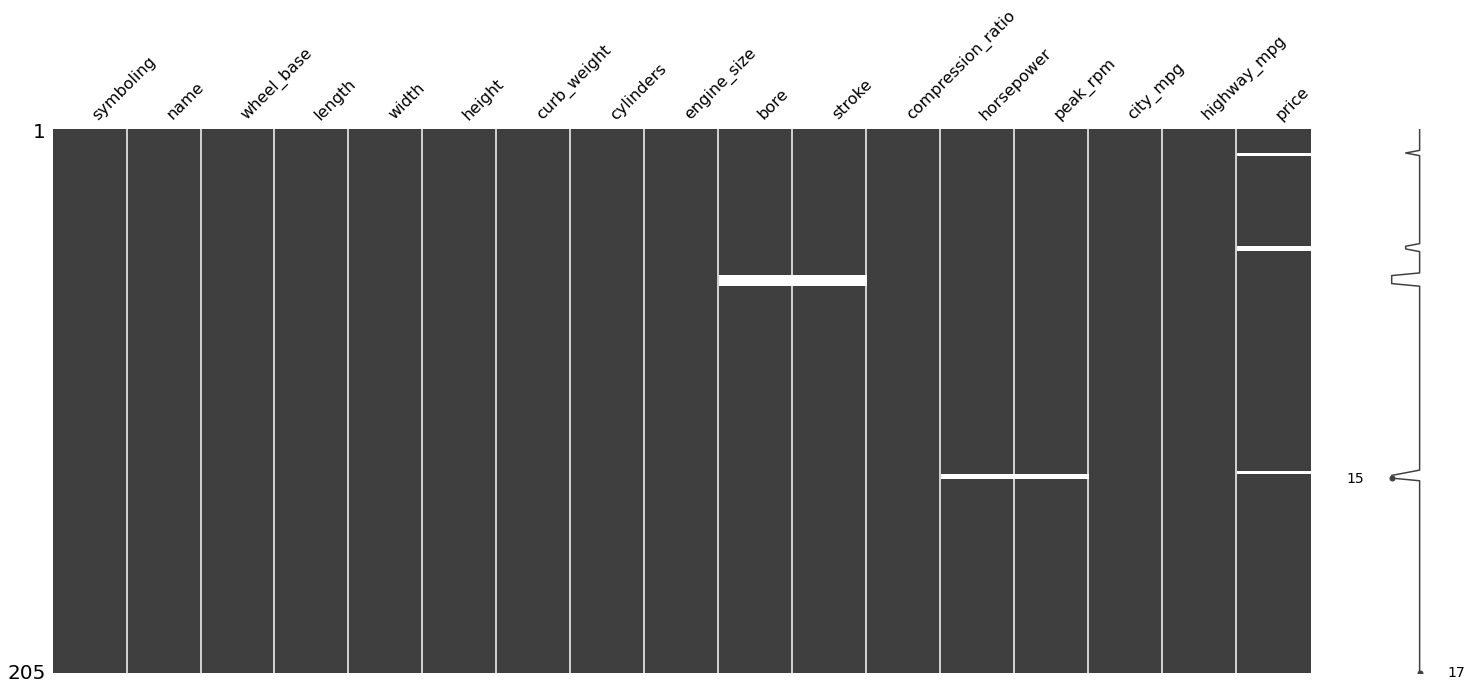

In [ ]:
msno.matrix(data)

In [ ]:
# checking what cars are missing in bore and stroke
data.loc[data['stroke'].isna(),['name','bore','stroke']]

,name,bore,stroke
55,mazda,NaN,NaN
56,mazda,NaN,NaN
57,mazda,NaN,NaN
58,mazda,NaN,NaN


Let's check what are the values of `bore`and `stroke`columns for other mazda cars.

In [ ]:
data.loc[data['name']=='mazda',['name','bore','stroke']]

,name,bore,stroke
50,mazda,3.03,3.15
51,mazda,3.03,3.15
52,mazda,3.03,3.15
53,mazda,3.03,3.15
54,mazda,3.08,3.15
55,mazda,NaN,NaN
56,mazda,NaN,NaN
57,mazda,NaN,NaN
58,mazda,NaN,NaN
59,mazda,3.39,3.39


Let's replace the `bore` and `stroke` missing values by the mean of that variables for cars that are 'mazda'.


In [ ]:
#data.loc[data['name']=='mazda','bore'].mean()
data.loc[data['bore'].isna(),'bore'] = data.loc[data['name']=='mazda','bore'].mean()
data.loc[data['stroke'].isna(),'stroke'] = data.loc[data['name']=='mazda','stroke'].mean()

In [ ]:
print('checking if the code above worked!')
print(data.loc[data['name']=='mazda',['name','bore','stroke']])

checking if the code above worked!
     name      bore    stroke
50  mazda  3.030000  3.150000
51  mazda  3.030000  3.150000
52  mazda  3.030000  3.150000
53  mazda  3.030000  3.150000
54  mazda  3.080000  3.150000
55  mazda  3.286923  3.299231
56  mazda  3.286923  3.299231
57  mazda  3.286923  3.299231
58  mazda  3.286923  3.299231
59  mazda  3.390000  3.390000
60  mazda  3.390000  3.390000
61  mazda  3.390000  3.390000
62  mazda  3.390000  3.390000
63  mazda  3.390000  3.390000
64  mazda  3.390000  3.390000
65  mazda  3.760000  3.160000
66  mazda  3.430000  3.640000


In [ ]:
data.loc[data['horsepower'].isna(),['name','horsepower','peak_rpm']]

,name,horsepower,peak_rpm
130,renault,NaN,NaN
131,renault,NaN,NaN


In [ ]:
data.loc[data['name']=='renault',['name','horsepower','peak_rpm']]

,name,horsepower,peak_rpm
130,renault,NaN,NaN
131,renault,NaN,NaN


We do not have other renault cars in our data set to replace the missing values with the mean. Thus, we will remove it from the data set. Finally, we will drop rows with missing values in price column as well. 

In [ ]:
data = data.dropna(axis=0)
numeric_data = data.drop(labels=['name','symboling'],axis=1)
numeric_data = numeric_data.astype(float)

In [ ]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel_base         199 non-null    float64
 1   length             199 non-null    float64
 2   width              199 non-null    float64
 3   height             199 non-null    float64
 4   curb_weight        199 non-null    float64
 5   cylinders          199 non-null    float64
 6   engine_size        199 non-null    float64
 7   bore               199 non-null    float64
 8   stroke             199 non-null    float64
 9   compression_ratio  199 non-null    float64
 10  horsepower         199 non-null    float64
 11  peak_rpm           199 non-null    float64
 12  city_mpg           199 non-null    float64
 13  highway_mpg        199 non-null    float64
 14  price              199 non-null    float64
dtypes: float64(15)
memory usage: 24.9 KB


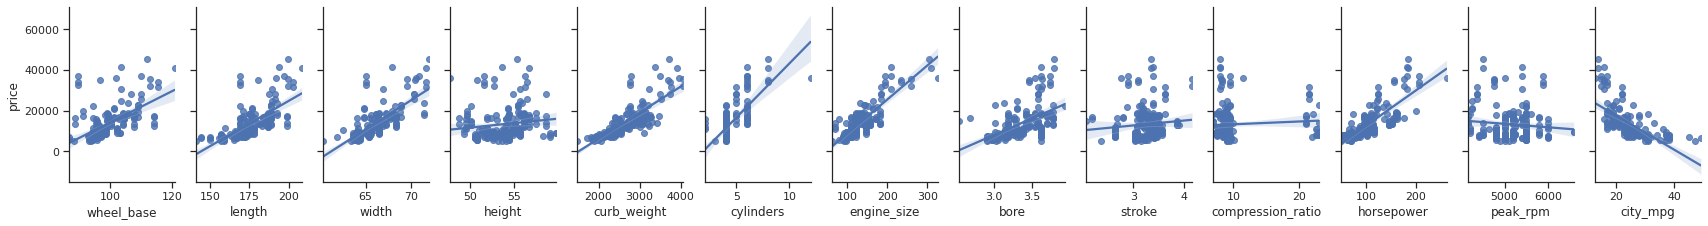

In [ ]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(y_vars='price',data = numeric_data,
             x_vars = ['wheel_base','length','width','height','curb_weight',
                       'cylinders','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg'],
             height=3,aspect=0.6,kind='reg',
             markers='o', 
             )

# Building the KNN predictor 

## Building a F feature predictor

Let's define a function that input feature names, number of neighbors, target variable and output the mse and rmse values for a given test set.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
def predictor(features,n_neighbors,target):
    X = numeric_data[features] #Features data frame
    Y = numeric_data[target]   #Target dataframe
    scaler = MinMaxScaler()
    scaled_X = scaler.fit_transform(X)
    X_train, X_test,Y_train,Y_test = train_test_split(scaled_X,Y,random_state = 1,test_size = 0.33)
    model = KNeighborsRegressor(n_neighbors = n_neighbors,algorithm = 'auto')
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(Y_test,predictions)
    rmse = mse**0.5
    return rmse

In [ ]:
#x_vars = ['wheel_base','length','width','curb_weight',
          #'cylinders','engine_size','bore',
          #'horsepower','city_mpg']
predictor(['wheel_base'],3,'price')

5542.232044676317

# Feature Engineering

In [ ]:
#Determining the best features for the prediction

k = [1,3,5,7,9,11,13,15,17] #Vector to vary the number of neighbors
x_vars = ['wheel_base','length','width','height','curb_weight','cylinders','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg']
avg_rmse = {features:{neig:0 for neig in k} for features in x_vars}

for j in x_vars:
    for i in k:
        avg_rmse[j][i] = predictor([j],i,'price')

In [ ]:
from statistics import mean
feature_rank = {values[0]:mean(values[1].values()) for values in avg_rmse.items()}

In [ ]:
series_rank = pd.Series(feature_rank).sort_values(ascending=True)
series_rank

horsepower           3612.358584
engine_size          3629.318586
width                4439.482821
city_mpg             4494.166289
curb_weight          4541.250732
length               5752.691428
wheel_base           5872.794469
cylinders            6225.842859
compression_ratio    6539.693986
bore                 6578.859331
stroke               7091.482770
peak_rpm             7271.851286
height               7751.019758
dtype: float64

As the table above shows, the best four features for price prediction. Let's take the first 5!

In [ ]:
X_vec = series_rank.index.to_list()[0:5]

In [ ]:
print('the choosen features are:',X_vec)

the choosen features are: ['horsepower', 'engine_size', 'width', 'city_mpg', 'curb_weight']


# Hyperparameter Tunning

Let's check what is the optimal number of neighbors and also choose the the number of j first best features!

In [ ]:
cross_validation = {best_feats:{neighbors:0 for neighbors in k} for best_feats in range(len(X_vec)) }

for i in range(len(X_vec)):
      for neighbors in k:
           feats = X_vec[0:i+1]
           predictions = predictor(feats,neighbors,'price')
           cross_validation[i][neighbors] = predictions


In [ ]:
#Reshaping the cross_validation dictionary to a dataframe
dataframe = pd.DataFrame(data= [[i, j, cross_validation[i][j]] for i in cross_validation for j in cross_validation[i]], columns = ['top_features','neighbors','rmse'])

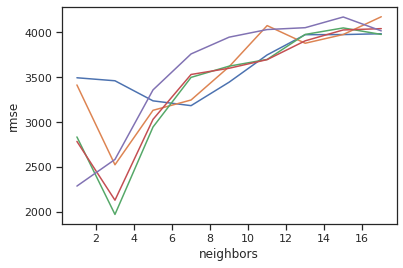

In [ ]:
for v in range(len(X_vec)):
  dados = dataframe.loc[dataframe['top_features'] == v,:]
  x = dados['neighbors']
  y = dados['rmse']
  sns.lineplot(x=x,y=y)

In [ ]:
# The best predictor is
print('The best Predictor is:')
print('\n')
print(dataframe.loc[dataframe['rmse'] == dataframe['rmse'].min(),:])

The best Predictor is:


    top_features  neighbors         rmse
19             2          3  1972.205782
